<a href="https://colab.research.google.com/github/raphaelz306/DMC_Course/blob/main/Integrador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Lectura de data
DATA = pd.read_csv('/content/autoinsurance_churn.csv')


In [3]:
#Revisión de data
DATA.head()

,individual_id,curr_ann_amt,days_tenure,age_in_years,city,state,county,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,Churn
0,2.213000e+11,837.936100,4496,59,Dallas,TX,Dallas,125000.0,1,2.0,Single,500000 - 749999,1,0,1,0
1,2.213000e+11,695.119342,6291,65,Mansfield,TX,Tarrant,70000.0,1,7.0,Married,125000 - 149999,1,1,1,0
2,2.213000e+11,1098.554718,549,35,Roanoke,TX,Denton,87500.0,0,3.0,Single,100000 - 124999,1,0,1,0
3,2.213000e+11,1192.408062,187,69,Rockwall,TX,Rockwall,125000.0,1,11.0,Married,125000 - 149999,1,0,1,1
4,2.213000e+11,555.786140,1611,67,Rockwall,TX,Rockwall,87500.0,0,9.0,Single,125000 - 149999,1,0,1,0


In [4]:
DATA.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041065 entries, 0 to 1041064
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   individual_id        1041065 non-null  float64
 1   curr_ann_amt         1041065 non-null  float64
 2   days_tenure          1041065 non-null  int64  
 3   age_in_years         1041065 non-null  int64  
 4   city                 1041065 non-null  object 
 5   state                1041065 non-null  object 
 6   county               1041065 non-null  object 
 7   income               1041065 non-null  float64
 8   has_children         1041065 non-null  int64  
 9   length_of_residence  1041065 non-null  float64
 10  marital_status       1041065 non-null  object 
 11  home_market_value    984630 non-null   object 
 12  home_owner           1041065 non-null  int64  
 13  college_degree       1041065 non-null  int64  
 14  good_credit          1041065 non-null  int64  
 15

In [ ]:
DATA.describe()

,individual_id,curr_ann_amt,days_tenure,age_in_years,income,has_children,length_of_residence,home_owner,college_degree,good_credit,Churn
count,1.041065e+06,1.041065e+06,1.041065e+06,1.041065e+06,1.041065e+06,1.041065e+06,1.041065e+06,1.041065e+06,1.041065e+06,1.041065e+06,1.041065e+06
mean,2.213017e+11,9.403699e+02,3.586114e+03,5.575170e+01,8.177197e+04,5.231883e-01,7.500420e+00,8.217153e-01,3.514891e-01,8.454362e-01,1.152464e-01
std,1.036131e+06,2.464787e+02,2.339735e+03,1.455359e+01,5.428144e+04,4.994623e-01,5.130430e+00,3.827524e-01,4.774356e-01,3.614886e-01,3.193192e-01
min,2.213000e+11,-1.462626e+02,2.000000e+01,2.300000e+01,5.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.213010e+11,7.720876e+02,1.384000e+03,4.500000e+01,4.750000e+04,0.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,2.213020e+11,9.351535e+02,3.616000e+03,5.500000e+01,7.000000e+04,1.000000e+00,6.801000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,2.213030e+11,1.103111e+03,6.291000e+03,6.400000e+01,8.750000e+04,1.000000e+00,1.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
max,2.213030e+11,2.269374e+03,6.291000e+03,1.140000e+02,2.500000e+05,1.000000e+00,1.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
#DataCheck
DATA.head()

,individual_id,curr_ann_amt,days_tenure,age_in_years,city,state,county,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,Churn
0,2.213000e+11,837.936100,4496,59,Dallas,TX,Dallas,125000.0,1,2.0,Single,500000 - 749999,1,0,1,0
1,2.213000e+11,695.119342,6291,65,Mansfield,TX,Tarrant,70000.0,1,7.0,Married,125000 - 149999,1,1,1,0
2,2.213000e+11,1098.554718,549,35,Roanoke,TX,Denton,87500.0,0,3.0,Single,100000 - 124999,1,0,1,0
3,2.213000e+11,1192.408062,187,69,Rockwall,TX,Rockwall,125000.0,1,11.0,Married,125000 - 149999,1,0,1,1
4,2.213000e+11,555.786140,1611,67,Rockwall,TX,Rockwall,87500.0,0,9.0,Single,125000 - 149999,1,0,1,0


In [5]:
#Reclasificación de Variables Categóricas
categorical = ['city','county','state','has_children','marital_status','home_market_value','home_owner','college_degree','good_credit']
DATA[categorical] = DATA[categorical].astype('category')

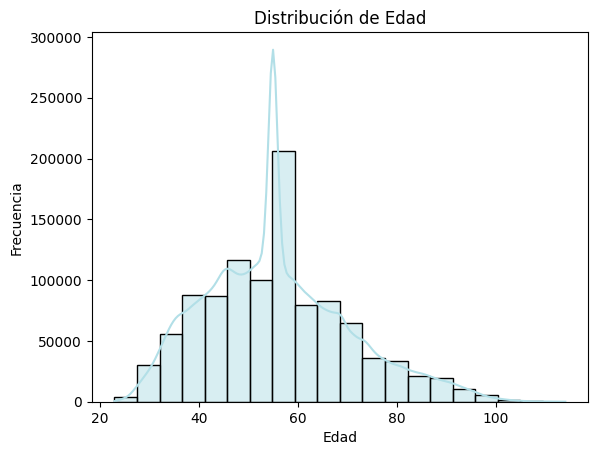

In [6]:
#Análisis descriptivo: EDAD
sns.histplot(data=DATA, x='age_in_years', kde=True, color='#B2DFE7', bins=20)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

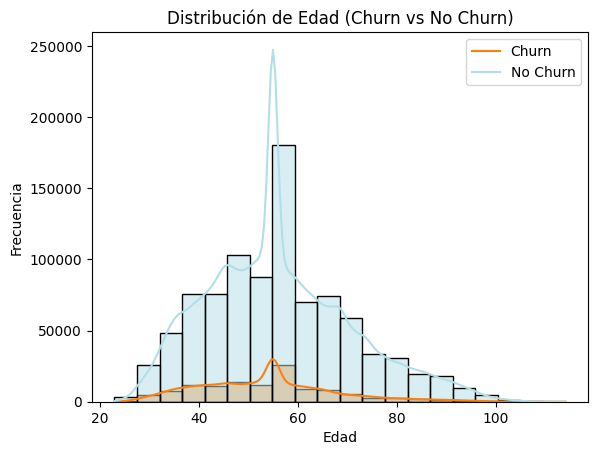

In [8]:
#Análisis descriptivo: FRECUENCIA DE CHURN DE ACUERDO A LA EDAD
sns.histplot(data=DATA, x='age_in_years', hue='Churn', kde=True, palette=['#B2DFE7', '#FF7F0E'], bins=20)
plt.title('Distribución de Edad (Churn vs No Churn)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend(labels=['Churn', 'No Churn'])
plt.show()

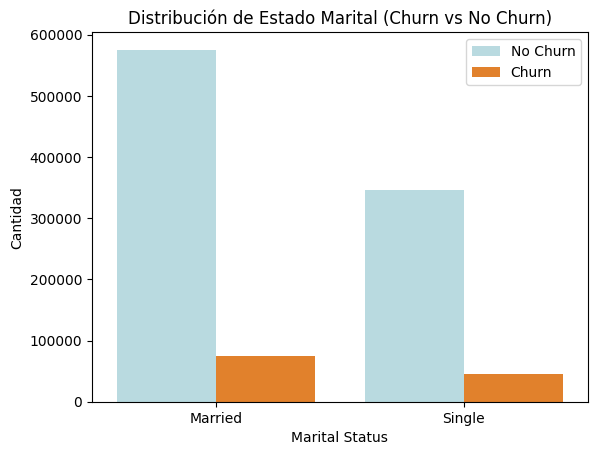

In [10]:
#Análisis descriptivo: Marital Status vs Churn
sns.countplot(data=DATA, x='marital_status', hue='Churn', palette=['#B2DFE7', '#FF7F0E'])
plt.title('Distribución de Estado Marital (Churn vs No Churn)')
plt.xlabel('Marital Status')
plt.ylabel('Cantidad')
plt.legend(labels=['No Churn', 'Churn'])
plt.show()

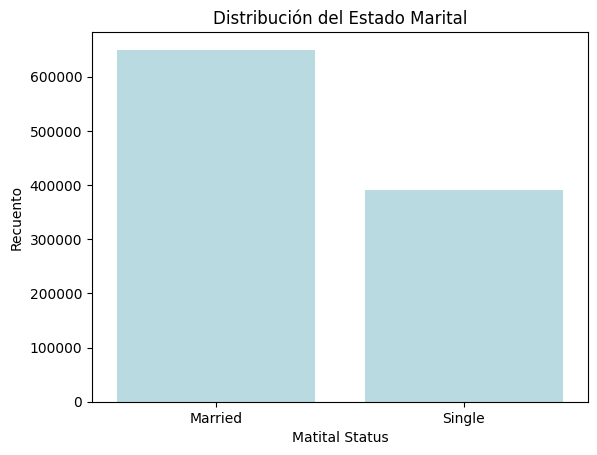

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener los recuentos de las categorías de Marital Status
MS_counts = DATA['marital_status'].value_counts()

# Crear un gráfico de barras para la distribución del Marital Status
sns.barplot(x=MS_counts.index, y=MS_counts.values, color='#B2DFE7')
plt.title('Distribución del Estado Marital')
plt.xlabel('Matital Status')
plt.ylabel('Recuento')
plt.show()

In [13]:
DATA.columns

Index(['individual_id', 'curr_ann_amt', 'days_tenure', 'age_in_years', 'city',
       'state', 'county', 'income', 'has_children', 'length_of_residence',
       'marital_status', 'home_market_value', 'home_owner', 'college_degree',
       'good_credit', 'Churn'],
      dtype='object')

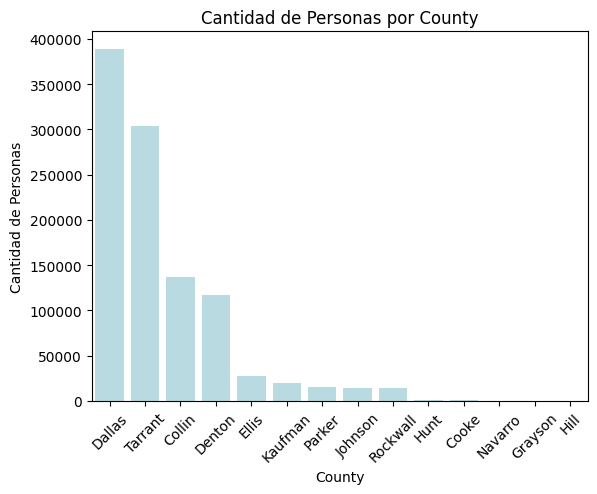

In [44]:
# Crear un gráfico de barras para contar la cantidad de personas por "county"
county_counts = DATA['county'].value_counts().sort_values(ascending=False)
sns.countplot(data=DATA, x='county', order=county_counts.index,color='#B2DFE7')
plt.title('Cantidad de Personas por County')
plt.xlabel('County')
plt.ylabel('Cantidad de Personas')
plt.xticks(rotation=45)
plt.show()

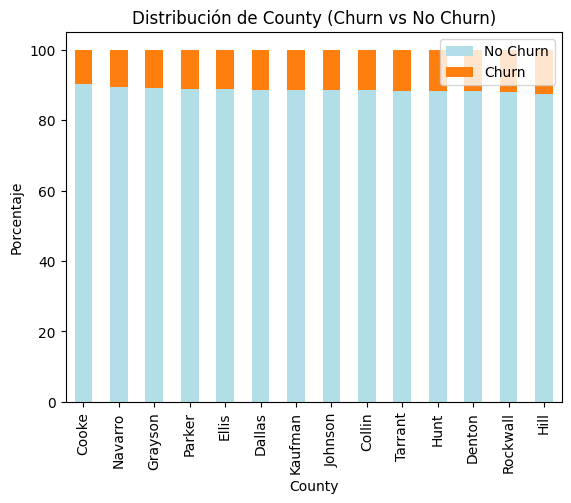

In [14]:
#Análisis descriptivo: COUNTY VS CHURN STACKED BARS
# Agrupar los datos por 'COUNTY' y 'CHURN' y contar las ocurrencias
grouped_data = DATA.groupby(['county', 'Churn']).size().unstack()

# Calcular el total para cada categoría de 'est_civil'
grouped_data['Total'] = grouped_data.sum(axis=1)

# Reemplazar las categorías de 'target' si están escritas de manera diferente
DATA['Churn'] = DATA['Churn'].replace({0: 'No Churn', 1: 'Churn'})

# Agrupar los datos por 'est_civil' y 'target' y contar las ocurrencias
grouped_data = DATA.groupby(['county', 'Churn']).size().unstack()

# Calcular el total para cada categoría de 'est_civil'
grouped_data['Total'] = grouped_data.sum(axis=1)

# Calcular los porcentajes para cada categoría de 'est_civil'
grouped_data['No Churn (%)'] = grouped_data['No Churn'] / grouped_data['Total'] * 100
grouped_data['Churn (%)'] = grouped_data['Churn'] / grouped_data['Total'] * 100

# Ordenar las categorías de 'est_civil' por el porcentaje de churn ascendente
grouped_data = grouped_data.sort_values(by='Churn (%)')

# Crear el gráfico de barras apiladas
ax = grouped_data[['No Churn (%)', 'Churn (%)']].plot(kind='bar', stacked=True, color=['#B2DFE7', '#FF7F0E'])
plt.title('Distribución de County (Churn vs No Churn)')
plt.xlabel('County')
plt.ylabel('Porcentaje')
plt.legend(labels=['No Churn', 'Churn'])
plt.show()


In [15]:
DATA.columns


Index(['individual_id', 'curr_ann_amt', 'days_tenure', 'age_in_years', 'city',
       'state', 'county', 'income', 'has_children', 'length_of_residence',
       'marital_status', 'home_market_value', 'home_owner', 'college_degree',
       'good_credit', 'Churn'],
      dtype='object')

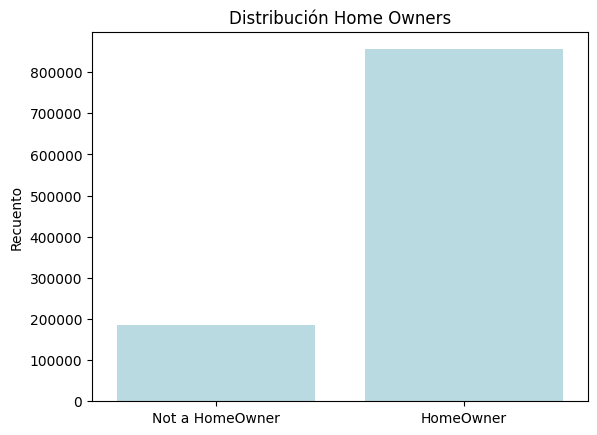

In [36]:
# Mapear los valores numéricos a etiquetas descriptivas
estado_civil_labels = {0: 'Not a HomeOwner', 1: 'HomeOwner'}

# Obtener los recuentos de homeowners y mapear los valores
estado_civil_counts = DATA['home_owner'].map(estado_civil_labels).value_counts()

# Crear un gráfico de barras para la distribución del estado civil
sns.barplot(x=estado_civil_counts.index, y=estado_civil_counts.values, color='#B2DFE7')
plt.title('Distribución Home Owners')

plt.ylabel('Recuento')
plt.show()

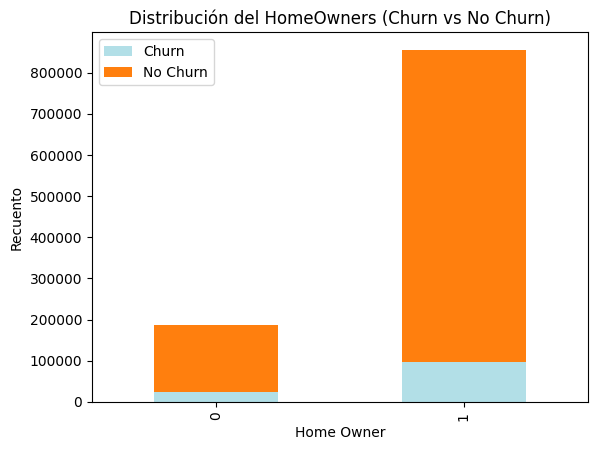

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapear los valores numéricos a etiquetas descriptivas
home_owner_labels = {0: 'No Home Owner', 1: 'Home Owner'}

# Obtener los recuentos de las categorías de estado civil por churn y no churn y mapear los valores
estado_civil_counts = DATA.groupby(['home_owner', 'Churn']).size().unstack()
estado_civil_counts.rename(columns=home_owner_labels, inplace=True)

# Crear un gráfico de barras apiladas para la distribución del estado civil
estado_civil_counts.plot(kind='bar', stacked=True, color=['#B2DFE7', '#FF7F0E'])
plt.title('Distribución del HomeOwners (Churn vs No Churn)')
plt.xlabel('Home Owner')
plt.ylabel('Recuento')
plt.legend(labels=['Churn', 'No Churn'])
plt.show()

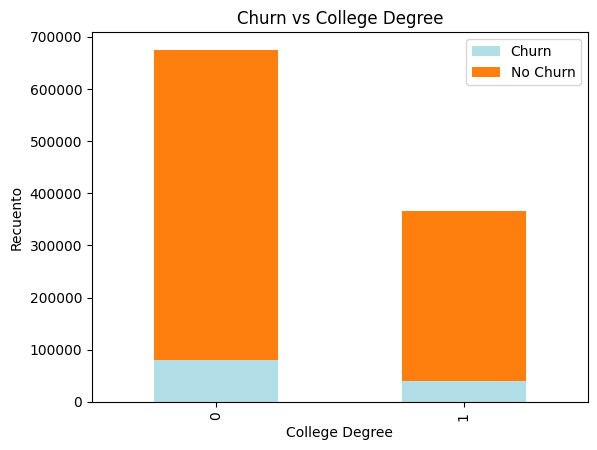

In [33]:
grouped_data = DATA.groupby(['college_degree', 'Churn']).size().unstack()

# Crear un gráfico de barras apiladas para la distribución de profesional
ax = grouped_data.plot(kind='bar', stacked=True, color=['#B2DFE7', '#FF7F0E'])
plt.title('Churn vs College Degree')
plt.xlabel('College Degree')
plt.ylabel('Recuento')

# Agregar etiquetas personalizadas en la leyenda
handles, labels = ax.get_legend_handles_labels()
labels = ['Churn', 'No Churn']
ax.legend(handles, labels)

plt.show()

**APLICACION DE RANDOM FOREST PARA LA CLASIFICACIÓN**

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [54]:
#Volver a leer la data para perder cualquier modificaciòn en el camino

DATA = pd.read_csv('/content/autoinsurance_churn.csv')
# Codificar las variables categóricas como 'marital_status', 'home_owner', 'college_degree', 'good_credit'
DATA['marital_status'] = DATA['marital_status'].map({'Single': 0, 'Married': 1})

In [58]:
#Crear nuevo dataset todo numerico para usar Random Forest
numeric_cols = ['curr_ann_amt', 'days_tenure', 'age_in_years', 'income', 'has_children',
                'length_of_residence', 'home_owner', 'Churn','marital_status','good_credit','college_degree']


new_data = DATA[numeric_cols].copy()
new_data.head()

,curr_ann_amt,days_tenure,age_in_years,income,has_children,length_of_residence,home_owner,Churn,marital_status,good_credit,college_degree
0,837.936100,4496,59,125000.0,1,2.0,1,0,0,1,0
1,695.119342,6291,65,70000.0,1,7.0,1,0,1,1,1
2,1098.554718,549,35,87500.0,0,3.0,1,0,0,1,0
3,1192.408062,187,69,125000.0,1,11.0,1,1,1,1,0
4,555.786140,1611,67,87500.0,0,9.0,1,0,0,1,0


In [69]:
# Dividir el dataset en conjunto de entrenamiento y conjunto de prueba
X = new_data.drop('Churn', axis=1)  # Variables predictoras
y = new_data['Churn']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)



In [72]:
# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

In [74]:
# Crear un DataFrame con los resultados reales y las predicciones
results = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})

In [78]:

results.head()
# Guardar los resultados en un archivo Excel
results.to_excel('resultados_prediccion.xlsx')

In [76]:
# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.8833568135245902
